In [1]:
import matplotlib.pyplot as plt
import numpy as np
# from numba import njit

/home/aegis/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [15]:
def initialize_lattice(L):
    lattice = np.random.choice([-1, 1], size = (L, L))
    return lattice
def compute_energy(lattice, J=1.0, H=0.0):
    L = lattice.shape[0] #number of rows
    energy = 0
    for i in range(L):
        for j in range(L):
            S = lattice[i, j]
            neighbors =  lattice[(i+1)%L, j] + lattice[(i-1)%L, j] + lattice[i, (j+1)%L] + lattice[i, (j-1)%L]
            energy += -J*S*neighbors
    energy /= 2
    energy += -H*np.sum(lattice)
    return energy
def compute_magnetization(lattice):
    magnetization = (1/lattice.size)*np.abs(np.sum(lattice))
    return magnetization
def monte_carlo_step(lattice, beta, J=1.0, H=0.0):
    L = lattice.shape[0] #number of rows
    for _ in range(L**2):
        i, j = np.random.randint(0, L-1), np.random.randint(0, L-1)
        S = lattice[i, j]
        neighbors = lattice[(i+1)%L, j] + lattice[(i-1)%L, j] + lattice[i, (j+1)%L] + lattice[i, (j-1)%L]
        dE = 2 * J * S * neighbors + 2 * H * S 
        if dE < 0 or np.random.rand() < np.exp(-beta*dE): 
            lattice[i, j] *= -1
def simulate_ising(L, T, J=1.0, H=0.0, equilibration_steps=100, mc_steps=1000):
    beta = 1.0 / T
    lattice = initialize_lattice(L)
    for _ in range(equilibration_steps):
        monte_carlo_step(lattice, beta, J, H)
    energies = []
    magnetizations = []
    for _ in range(mc_steps):
        monte_carlo_step(lattice, beta, J, H)
        energies.append(compute_energy(lattice)) 
        magnetizations.append(compute_magnetization(lattice)) 
    E_avg = np.mean(energies) 
    E2_avg = np.mean(np.array(energies)**2)
    M_avg = np.mean(magnetizations)  
    Cv = (beta**2)/lattice.size*(E2_avg-E_avg**2)  
    return Cv, M_avg, lattice

In [27]:
np.random.seed(262)

# Set parameters
L = 20  # Lattice size
J = -1.0 # Exchange interaction
H = 0.0 # external magnetic field
equilibration_steps = 1500
mc_steps = 10000
T_values = np.linspace(1.5, 3.5, 20)  # Temperature range
Cv_values = []
M_values = []

for T in T_values:
    Cv, M, lattice_sample = simulate_ising(L, T, J, H, equilibration_steps, mc_steps)
    Cv_values.append(Cv)
    M_values.append(M)

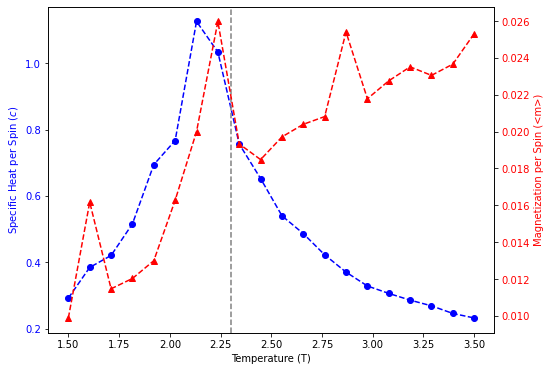

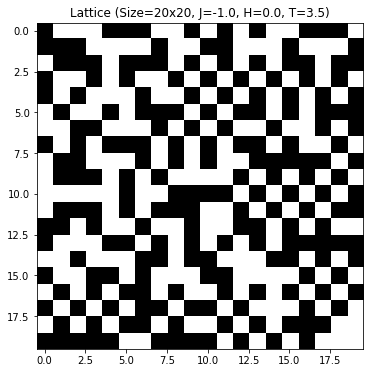

In [28]:
# Create a figure with a primary y-axis
fig, ax1 = plt.subplots(figsize=(8, 6))
# M_values = np.abs(np.array(M_values))
# Plot Specific Heat (Cv) on primary y-axis
ax1.plot(T_values, Cv_values, 'bo--', label='Specific Heat per Spin')
ax1.axvline(2.3, ls="--", color="gray") # Theoretical critical temperature for small lattices
ax1.set_xlabel('Temperature (T)')
ax1.set_ylabel('Specific Heat per Spin ($c$)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.plot(T_values, M_values, 'r^--', label='Magnetization per Spin')
ax2.set_ylabel('Magnetization per Spin (<m>)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Visualize the last lattice configuration
plt.figure(figsize=(6, 6))
plt.imshow(lattice_sample, cmap='gray', interpolation='nearest')
plt.title(f'Lattice (Size={L}x{L}, J={J}, H={H}, T={T_values[-1]})')
plt.show()
